In [175]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.fft as fft
import scipy.signal as signal
from scipy.linalg import norm 
from scipy.signal import TransferFunction as tf

import yfinance as yf


[*********************100%***********************]  1 of 1 completed


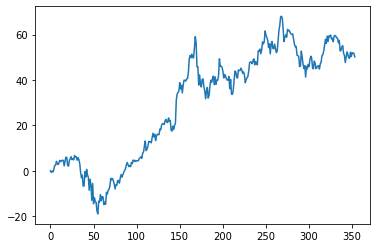

In [176]:
aapl = yf.download("AAPL", start="2020-01-01", end="2021-06-01")
stock_prices = np.array(aapl["Close"])

# 400 most recent days
start = -400
end = -1
raw_data = stock_prices
data = raw_data[start:end] 
initial_conditions = data[0]
data -= initial_conditions
plt.plot(data)

In [177]:

#finds the frequency band that contains the given energy
def band(Pxx, E):
    n = 0
    En = 0
    while En < E:
        En += Pxx[n]
        n += 1
    return n

0.0078125


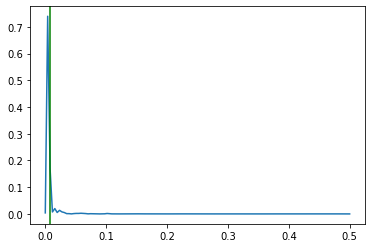

In [178]:
Ep = 0.7 #percent energy band

freqs, psd = signal.welch(data)
psd = psd/norm(psd, 1)
b = freqs[band(psd, Ep)]

#"""
plt.figure()
plt.plot(freqs, psd)
plt.axvline(b, color='green') # cutoff frequency
#"""

"""
plt.figure()
f, Pxx_spec = signal.welch(data)
plt.plot(f, Pxx_spec)
"""

print(b)


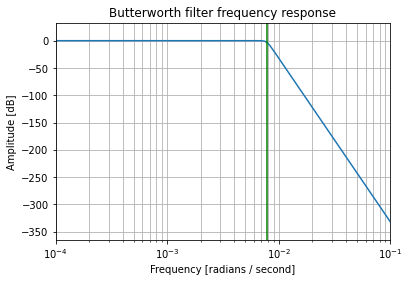

In [179]:
N = 15
W = b
b, a = signal.butter(N, W, 'low', 'ba')
w, h = signal.freqs(b, a, len(freqs))

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(W, color='green') # cutoff frequency
plt.show()



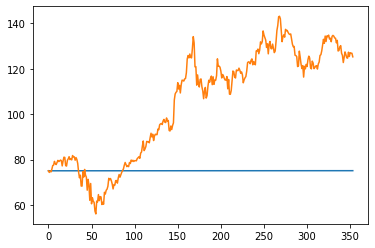

In [180]:
sos = signal.butter(N, W, 'low', output='sos')
filtered = signal.sosfilt(sos, data)
plt.plot(filtered + initial_conditions)
plt.plot(data + initial_conditions)

MA length for 70.0%: 356


<AxesSubplot:xlabel='Date'>

<Figure size 432x288 with 0 Axes>

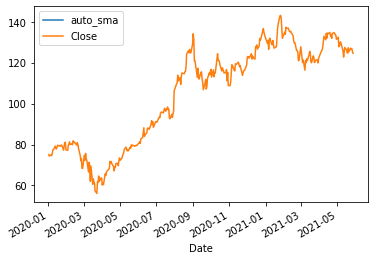

In [181]:
L = round(np.sqrt(0.196202+(W/(2*np.pi))**2)/(W/(2*np.pi)))
print("MA length for {}%: {}".format(Ep*100, L))

aapl["auto_sma"] = aapl["Close"].rolling(L).mean()
plt.figure()
aapl[["auto_sma", "Close"]].plot()




In [182]:
"""
sys = signal.TransferFunction(num, den)
T, yout, xout = signal.lsim(sys, data, np.arange(len(data)))
plt.plot(T, yout)
"""

'\nsys = signal.TransferFunction(num, den)\nT, yout, xout = signal.lsim(sys, data, np.arange(len(data)))\nplt.plot(T, yout)\n'